In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.patches import Rectangle
import matplotlib.ticker as plticker

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib
import cartopy

print(matplotlib.__version__)
print(cartopy.__version__)

3.9.2
0.23.0


In [7]:
ds = xr.open_dataset(r"C:\Users\cathe\Downloads\gpw-v4-basic-demographic-characteristics-rev11_bt_dens_15_min_nc\gpw_v4_basic_demographic_characteristics_rev11_bt_2010_dens_15_min.nc")
ds = ds.sel(raster=8)

In [13]:
pop_30=ds['Basic Demographic Characteristics, v4.10 (2010): Both, Density, 15 arc-minutes']


In [14]:
ds = xr.open_dataset(r"C:\Users\cathe\Downloads\gpw-v4-basic-demographic-characteristics-rev11_bt_dens_15_min_nc\gpw_v4_basic_demographic_characteristics_rev11_bt_2010_dens_15_min.nc")
ds = ds.sel(raster=9)

In [15]:
pop_35=ds['Basic Demographic Characteristics, v4.10 (2010): Both, Density, 15 arc-minutes']

In [16]:
pop_YA = pop_20+pop_25+pop_30+pop_35

In [22]:
np.nanmean(pop_YA)

15.826559

In [23]:
pop_YA.to_netcdf(r"C:\Users\cathe\Downloads\Global_demographics\global_YA.nc")

In [25]:
ds = xr.open_dataset(r"C:\Users\cathe\Downloads\Global_demographics\global_YA.nc")
pop = ds['Basic Demographic Characteristics, v4.10 (2010): Both, Density, 15 arc-minutes']
pop

<xarray.DataArray 'Basic Demographic Characteristics, v4.10 (2010): Both, Density, 15 arc-minutes' (
                                                                                                    latitude: 720,
                                                                                                    longitude: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * latitude   (latitude) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88

In [27]:
population = pop.sel(longitude=slice(22,65), latitude=slice(33,17))

In [29]:
lon = population['longitude']
lat = population['latitude']

In [37]:
ds = xr.open_dataset(r"C:\Users\cathe\Downloads\Global_demographics\global_65+.nc")
population = ds['__xarray_dataarray_variable__'].sel(x=slice(22,65), y=slice(33,17))

In [28]:
population

<xarray.DataArray 'Basic Demographic Characteristics, v4.10 (2010): Both, Density, 15 arc-minutes' (
                                                                                                    latitude: 64,
                                                                                                    longitude: 172)>
[11008 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 22.12 22.38 22.62 22.88 ... 64.38 64.62 64.88
  * latitude   (latitude) float64 32.88 32.62 32.38 32.12 ... 17.62 17.38 17.12

In [38]:
lon = population['x']
lat = population['y']

In [34]:
DS = xr.open_dataset(r"C:\Users\cathe\OneDrive\Desktop\Survivable\Survive_Case_studies\Night-Indoors_6H_65_over_MiddleEast_2024.nc")
survive1 = DS['__xarray_dataarray_variable__'].drop_vars(['humidity','temperature'])
survive1


<xarray.DataArray '__xarray_dataarray_variable__' (time: 720, latitude: 65,
                                                   longitude: 173)>
[8096400 values with dtype=int32]
Coordinates:
  * longitude  (longitude) float32 22.0 22.25 22.5 22.75 ... 64.5 64.75 65.0
  * latitude   (latitude) float32 33.0 32.75 32.5 32.25 ... 17.5 17.25 17.0
  * time       (time) datetime64[ns] 2024-06-01 ... 2024-06-30T23:00:00

In [41]:
survive2 = survive1.resample(time='1D').max()
survive = survive2.sum(dim='time')/20

In [42]:
#survive=survive/30
np.nanmax(survive)

1.05

In [39]:
population = population.rename({'y':'latitude', 'x':'longitude'})


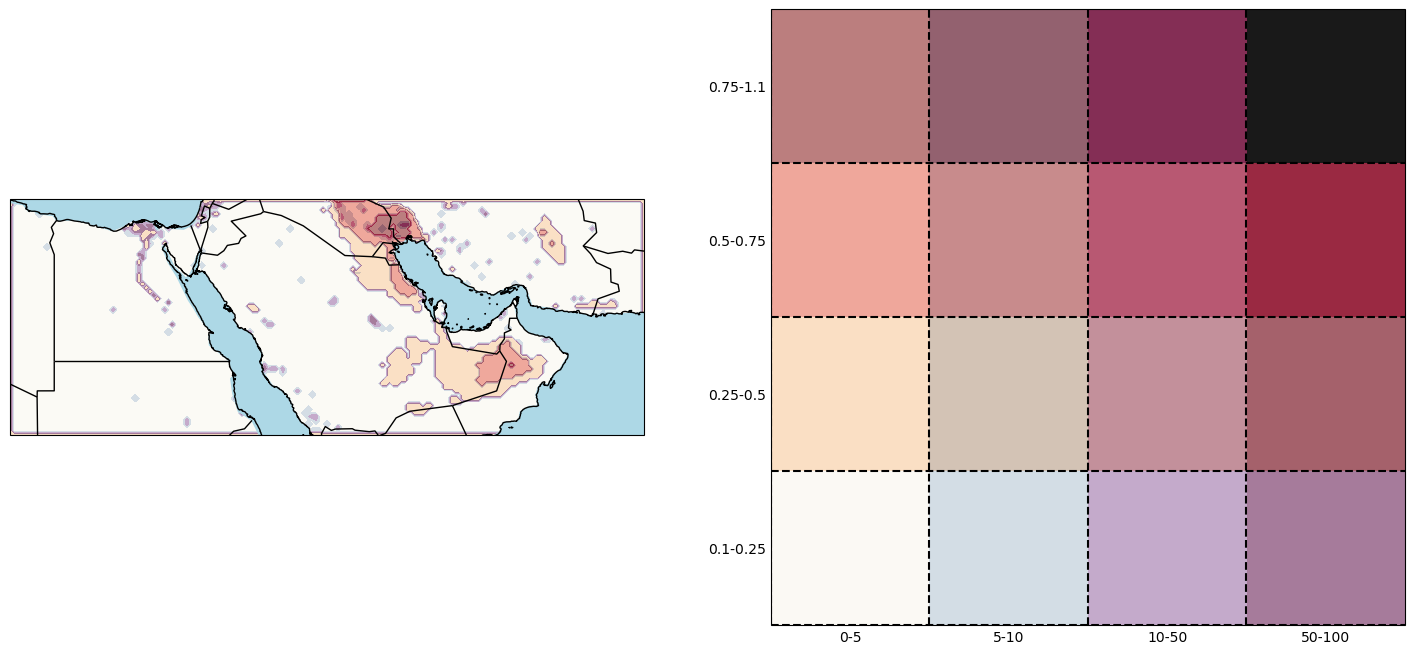

In [43]:
#### import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define bins
survive_bins = np.array([0.1, 0.25, 0.5, 0.75, 1.1])  # Survive metric bins
pop_density_bins = np.array([0, 5, 10, 50, 100])    # Population density bins

n_survive_levels = len(survive_bins) - 1
n_pop_density_levels = len(pop_density_bins) - 1

# Resample population data to match survive data's resolution
population_resampled = population.interp_like(survive1, method='nearest')

# Digitize the values
survive_digitized = np.digitize(survive, survive_bins) - 1
pop_density_digitized = np.digitize(population_resampled, pop_density_bins) - 1

# Ensure digitized arrays are the same shape
if survive_digitized.shape != pop_density_digitized.shape:
    raise ValueError("Digitized arrays are not the same shape!")

# Create combined index for colormap
combined_index = (survive_digitized * n_pop_density_levels) + pop_density_digitized

# Handle the case where survive == 0
combined_index = np.where(survive == 0, 0, combined_index + 1)

# Define new color maps using 'OrRd' for survive and 'BuPu' for population density
survive_cmap = plt.get_cmap('OrRd', n_survive_levels)  # 'OrRd' for survival
pop_density_cmap = plt.get_cmap('BuPu', n_pop_density_levels)  # 'BuPu' for population density

# Create combined color map
combined_colors = np.zeros((n_survive_levels * n_pop_density_levels + 2, 3))  # +2 for white and extra color

# Generate colors for the grid
for i in range(n_survive_levels):
    for j in range(n_pop_density_levels):
        survive_color = np.array(survive_cmap((i + 0.5) / n_survive_levels)[:3])  # Middle of each bin
        pop_density_color = np.array(pop_density_cmap((j + 0.5) / n_pop_density_levels)[:3])  # Middle of each bin
        # Combine colors by blending
        combined_color = (survive_color * 0.5 + pop_density_color * 0.5)
        combined_colors[i * n_pop_density_levels + j + 1, :] = combined_color  # +1 for white

combined_colors[0, :] = [1, 1, 1]  # White for survive == 0
combined_colors[-1, :] = [0.1, 0.1, 0.1]  # Add an extra distinct color, e.g., very dark grey

# Create the colormap
combined_cmap = ListedColormap(combined_colors)
bounds = np.arange(n_survive_levels * n_pop_density_levels + 2) - 0.5
norm = BoundaryNorm(bounds, combined_cmap.N)

# Create figure and axes
fig, (ax_map, ax_heatmap) = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

heatmap = ax_map.contourf(population_resampled['longitude'], population_resampled['latitude'], combined_index, 
                          levels=np.arange(combined_cmap.N), cmap=combined_cmap, norm=norm)
ax_map.coastlines(resolution='10m', color='black', linewidth=1)
ax_map.add_feature(cfeature.OCEAN, zorder=1, color='lightblue')
ax_map.add_feature(cfeature.BORDERS)

# Outline the map in green
outline = Rectangle((-180, -60), 360, 120, edgecolor='green', facecolor='none', linewidth=2, zorder=10)
ax_map.add_patch(outline)

# Labels and Title for Map
ax_map.set_xlabel('Longitude')
ax_map.set_ylabel('Latitude')

# Create heatmap colorbar as a 4x4 grid
heatmap_colors = np.arange(1, n_survive_levels * n_pop_density_levels + 1).reshape(n_survive_levels, n_pop_density_levels)
norm = BoundaryNorm(bounds, combined_cmap.N)

# Plot heatmap colorbar
cbar_img = ax_heatmap.imshow(heatmap_colors, cmap=combined_cmap, norm=norm, aspect='auto')

# Add grid lines
for i in range(n_survive_levels):
    ax_heatmap.axhline(i - 0.5, color='k', linestyle='--')
for j in range(n_pop_density_levels):
    ax_heatmap.axvline(j - 0.5, color='k', linestyle='--')

# Flip the y-axis
ax_heatmap.invert_yaxis()

# Set ticks and labels for the colorbar heatmap
ax_heatmap.set_xticks(np.arange(n_pop_density_levels))
ax_heatmap.set_yticks(np.arange(n_survive_levels))
ax_heatmap.set_xticklabels([f"{pop_density_bins[j]}-{pop_density_bins[j+1]}" for j in range(n_pop_density_levels)])
ax_heatmap.set_yticklabels([f"{survive_bins[i]}-{survive_bins[i+1]}" for i in range(n_survive_levels)])
ax_heatmap.tick_params(length=0)
plt.show()

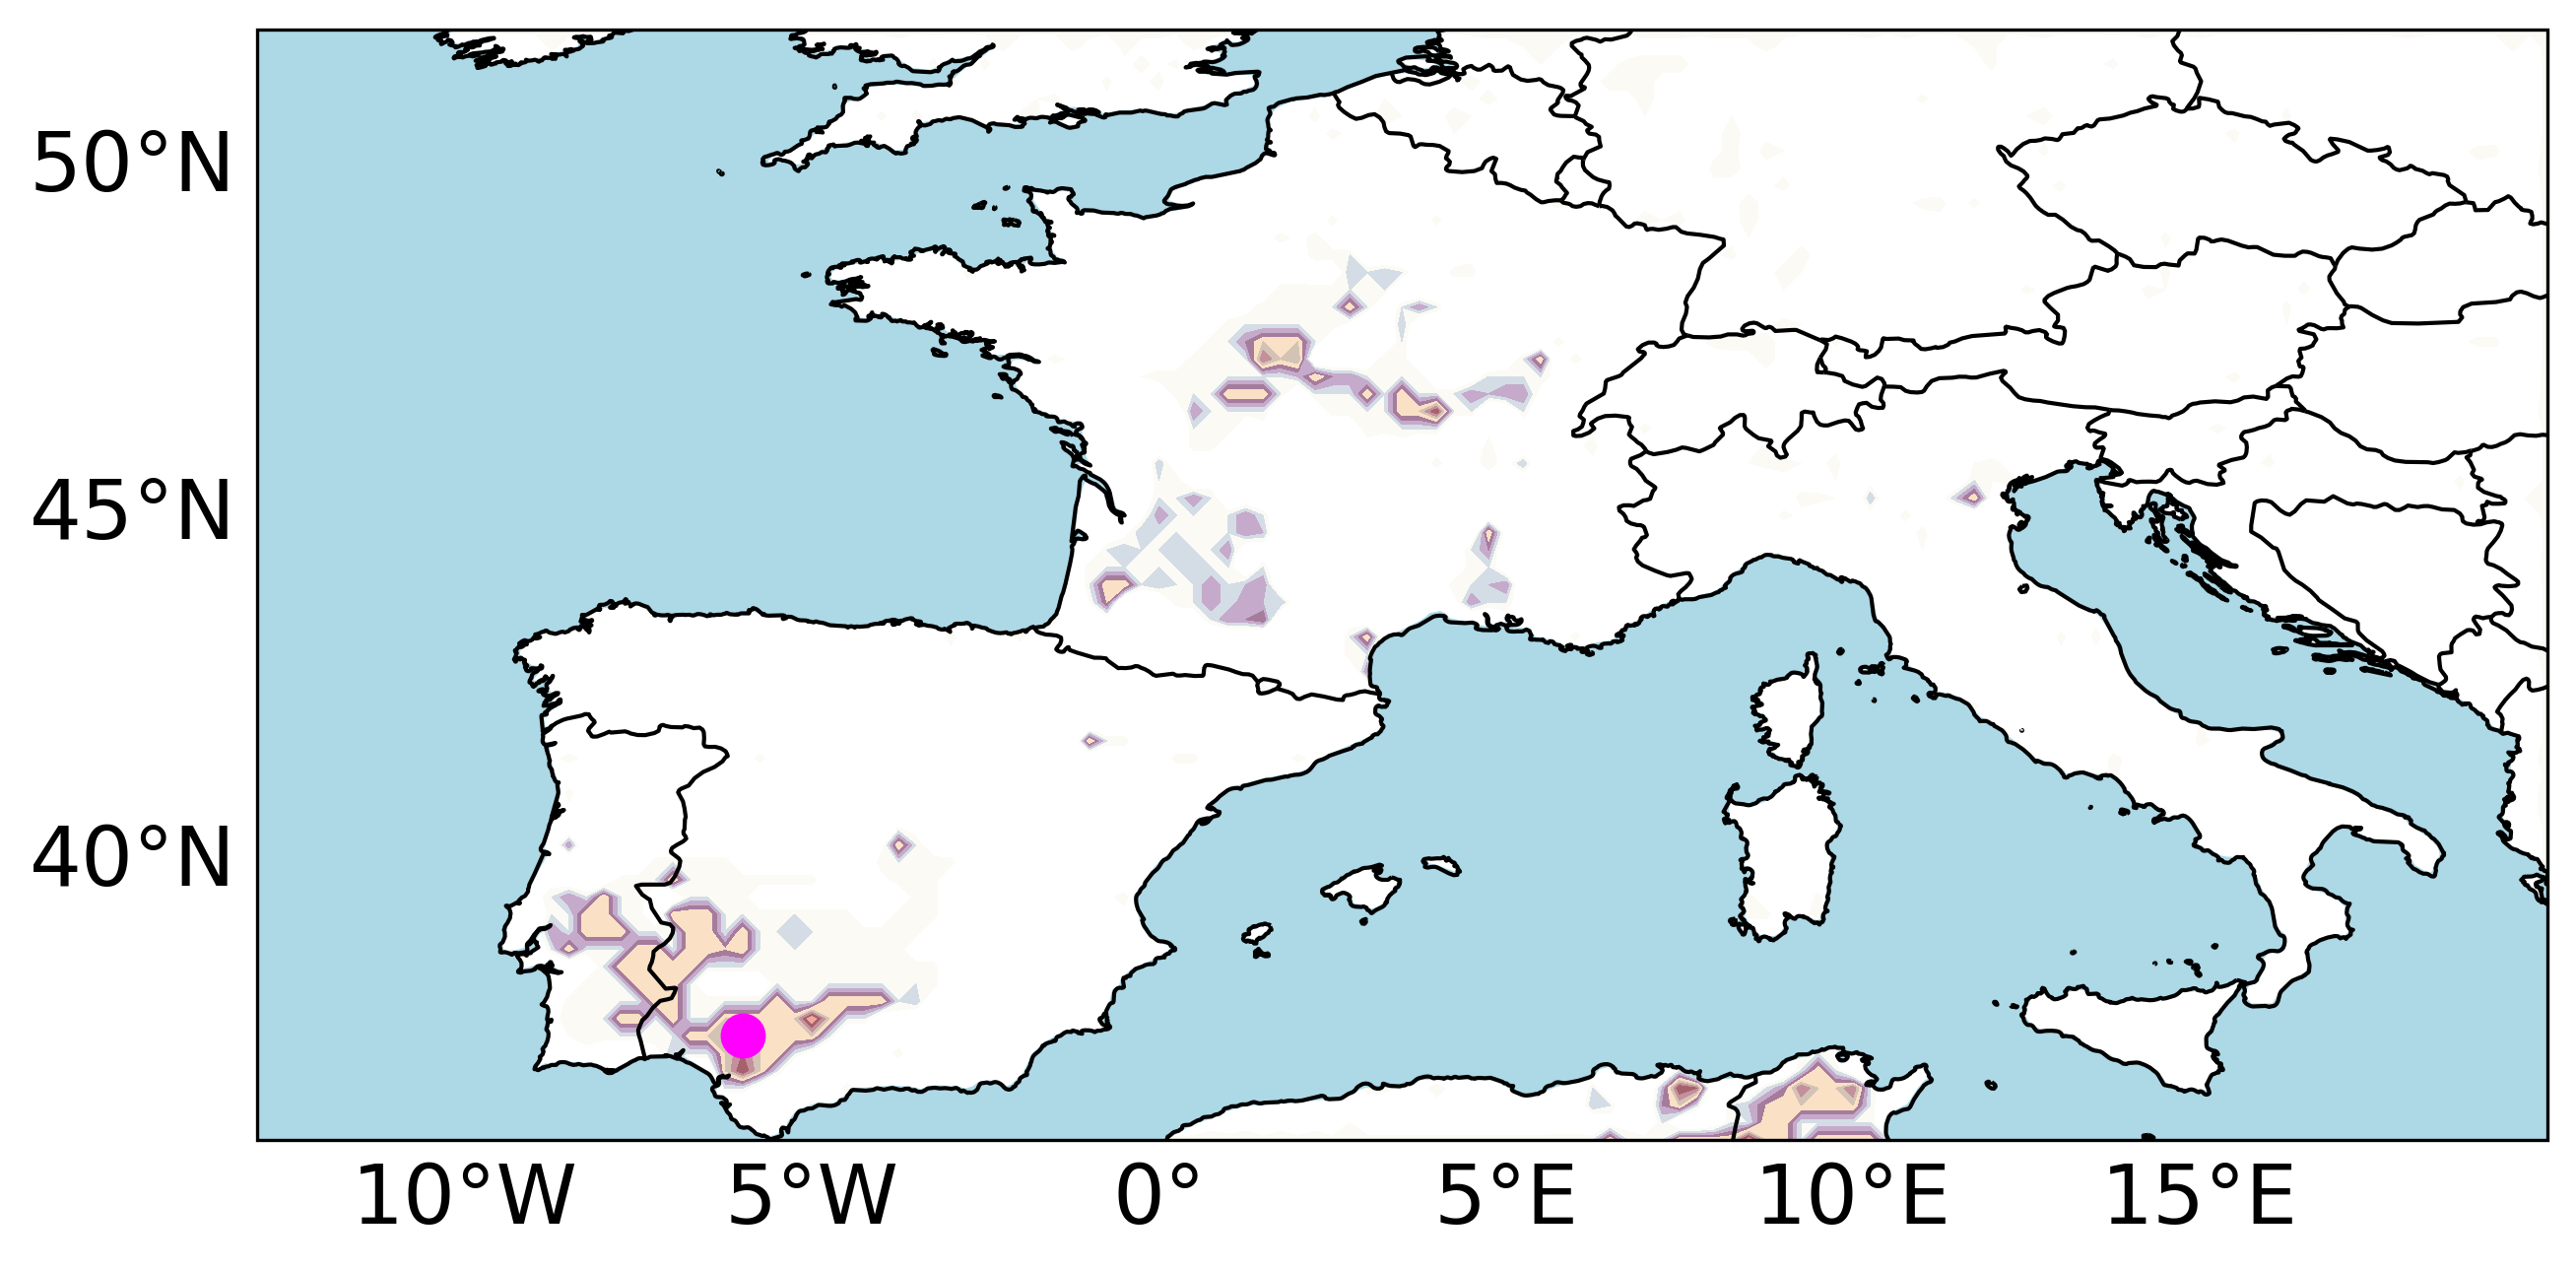

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Define bins
survive_bins = np.array([0.1, 0.25, 0.5, 0.75, 1.1])  # Survive metric bins
pop_density_bins = np.array([0, 5, 10, 50, 100])    # Population density bins

n_survive_levels = len(survive_bins) - 1
n_pop_density_levels = len(pop_density_bins) - 1

# Resample population data to match survive data's resolution
population_resampled = population.interp_like(survive, method='nearest')

# Digitize the values
survive_digitized = np.digitize(survive, survive_bins) - 1
pop_density_digitized = np.digitize(population_resampled, pop_density_bins) - 1

# Ensure digitized arrays are the same shape
if survive_digitized.shape != pop_density_digitized.shape:
    raise ValueError("Digitized arrays are not the same shape!")

# Create combined index for colormap
combined_index = (survive_digitized * n_pop_density_levels) + pop_density_digitized

# Handle the case where survive == 0
combined_index = np.where(survive == 0, 0, combined_index + 1)

# Define new color maps using 'OrRd' for survive and 'BuPu' for population density
survive_cmap = plt.get_cmap('OrRd', n_survive_levels)  # 'OrRd' for survival
pop_density_cmap = plt.get_cmap('BuPu', n_pop_density_levels)  # 'BuPu' for population density

# Create combined color map
combined_colors = np.zeros((n_survive_levels * n_pop_density_levels + 2, 3))  # +2 for white and extra color

# Generate colors for the grid
for i in range(n_survive_levels):
    for j in range(n_pop_density_levels):
        survive_color = np.array(survive_cmap((i + 0.5) / n_survive_levels)[:3])  # Middle of each bin
        pop_density_color = np.array(pop_density_cmap((j + 0.5) / n_pop_density_levels)[:3])  # Middle of each bin
        # Combine colors by blending
        combined_color = (survive_color * 0.5 + pop_density_color * 0.5)
        combined_colors[i * n_pop_density_levels + j + 1, :] = combined_color  # +1 for white

combined_colors[0, :] = [1, 1, 1]  # White for survive == 0
combined_colors[-1, :] = [0.1, 0.1, 0.1]  # Add an extra distinct color, e.g., very dark grey

# Create the colormap
combined_cmap = ListedColormap(combined_colors)
bounds = np.arange(n_survive_levels * n_pop_density_levels + 2) - 0.5
norm = BoundaryNorm(bounds, combined_cmap.N)

# Create the map figure
fig, ax_map = plt.subplots(1, 1, figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=300)

# Plot the filled contour map
heatmap = ax_map.contourf(population_resampled['longitude'], population_resampled['latitude'], combined_index, 
                          levels=np.arange(combined_cmap.N), cmap=combined_cmap, norm=norm)

# Add coastlines and features
ax_map.coastlines(resolution='10m', color='black', linewidth=1)
ax_map.add_feature(cfeature.OCEAN, zorder=1, color='lightblue')
ax_map.add_feature(cfeature.BORDERS)

gl = ax_map.gridlines(draw_labels=True, color='gray', linestyle='', alpha=0, linewidth=2)
gl.top_labels = False  # Disable labels on the top
gl.right_labels = False  # Disable labels on the right
gl.left_labels = True  # Enable labels on the left if needed
gl.bottom_labels = True  # Enable labels on the bottom if needed
gl.xlocator = plticker.MultipleLocator(5)  # Longitude every 5 degrees
gl.ylocator = plticker.MultipleLocator(5) 
# Set the text size of the gridline labels
gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

# Add a magenta dot at the given coordinates (lon=67, lat=24.86)
ax_map.plot(-6, 37.5, marker='o', color='magenta', markersize=10, transform=ccrs.Geodetic())

# Labels and Title for the Map
ax_map.set_xlabel('Longitude')
ax_map.set_ylabel('Latitude')

plt.show()


##### 